# Predicting “Fraud or not in auto insurance claims” and Pattern extraction


Problem statement: To create an analytical and modeling framework to predict the fraud in automobile insurance claims based on the demographic,
policy, claim, and vehicle related features provided in the datasets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# IMPORTING DATASET

In [3]:
data_claim = pd.read_csv('Train_Claim.csv',na_values=['?','MISSEDDATA','MISSINGVALUE','-5'])
data_demographics = pd.read_csv('Train_Demographics.csv',na_values=['?','MISSEDDATA','MISSINGVALUE'])
data_policy = pd.read_csv('Train_Policy.csv',na_values=['?','MISSEDDATA','MISSINGVALUE','-1','MISSINGVAL'])
data_vehicle = pd.read_csv('Train_Vehicle.csv',na_values=['?','MISSEDDATA','MISSINGVALUE','???'])
data_target = pd.read_csv('Traindata_with_Target.csv',na_values=['?','MISSEDDATA','MISSINGVALUE'])

In [4]:
test_data_claim = pd.read_csv(r'C:\Users\win10\Desktop\New folder (4)\capstone-files\TestData\Test_Claim.csv',na_values=['?','MISSEDDATA','MISSINGVALUE','-5'])
test_data_demographics = pd.read_csv(r'C:\Users\win10\Desktop\New folder (4)\capstone-files\TestData\Test_Demographics.csv',na_values=['?','MISSEDDATA','MISSINGVALUE'])
test_data_policy = pd.read_csv(r'C:\Users\win10\Desktop\New folder (4)\capstone-files\TestData\Test_Policy.csv',na_values=['?','MISSEDDATA','MISSINGVALUE','-1','MISSINGVAL'])
test_data_vehicle = pd.read_csv(r'C:\Users\win10\Desktop\New folder (4)\capstone-files\TestData\Test_Vehicle.csv',na_values=['?','MISSEDDATA','MISSINGVALUE','???'])

In [5]:
data_claim.head()

CustomerID DateOfIncident            TypeOfIncident TypeOfCollission  \
0  Cust10000     2015-02-03   Multi-vehicle Collision   Side Collision   
1  Cust10001     2015-02-02   Multi-vehicle Collision   Side Collision   
2  Cust10002     2015-01-15  Single Vehicle Collision   Side Collision   
3  Cust10003     2015-01-19  Single Vehicle Collision   Side Collision   
4  Cust10004     2015-01-09  Single Vehicle Collision   Rear Collision   

  SeverityOfIncident AuthoritiesContacted IncidentState IncidentCity  \
0         Total Loss               Police        State7        City1   
1         Total Loss               Police        State7        City5   
2       Minor Damage                Other        State8        City6   
3       Minor Damage                Other        State9        City6   
4       Minor Damage                 Fire        State8        City6   

  IncidentAddress  IncidentTime  NumberOfVehicles PropertyDamage  \
0   Location 1311          17.0                 3            NaN   
1   Location 1311          10.0                 3            YES   
2   Location 2081          22.0                 1            YES   
3   Location 2081          22.0                 1            YES   
4   Location 1695          10.0                 1             NO   

   BodilyInjuries  Witnesses PoliceReport  AmountOfTotalClaim  \
0               1        0.0          NaN             65501.0   
1               2        1.0          YES             61382.0   
2               2        3.0           NO             66755.0   
3               2        3.0           NO             66243.0   
4               2        1.0          YES             53544.0   

   AmountOfInjuryClaim  AmountOfPropertyClaim  AmountOfVehicleDamage  
0                13417                   6071                  46013  
1                15560                   5919                  39903  
2                11630                  11630                  43495  
3                12003                  12003                  42237  
4                 8829                   7234                  37481

In [6]:
data_policy.head()

InsurancePolicyNumber  CustomerLoyaltyPeriod DateOfPolicyCoverage  \
0                 110122                    328           2014-10-17   
1                 110125                    256           1990-05-25   
2                 110126                    228           2014-06-06   
3                 110127                    256           2006-10-12   
4                 110128                    137           2000-06-04   

  InsurancePolicyState Policy_CombinedSingleLimit  Policy_Deductible  \
0               State3                    250/500               1000   
1               State1                    250/500               2000   
2               State1                   500/1000               1000   
3               State3                    250/500               1000   
4               State2                    250/500               1000   

   PolicyAnnualPremium  UmbrellaLimit InsuredRelationship CustomerID  
0              1406.91              0             husband   Cust1001  
1              1415.74        6000000           unmarried   Cust1004  
2              1583.91        6000000           unmarried   Cust1005  
3              1351.10              0           unmarried   Cust1006  
4              1333.35              0             husband   Cust1007

In [7]:
data_demographics.head()

CustomerID  InsuredAge  InsuredZipCode InsuredGender InsuredEducationLevel  \
0  Cust10000          35          454776          MALE                    JD   
1  Cust10001          36          454776          MALE                    JD   
2  Cust10002          33          603260          MALE                    JD   
3  Cust10003          36          474848          MALE                    JD   
4  Cust10004          29          457942        FEMALE           High School   

  InsuredOccupation InsuredHobbies  CapitalGains  CapitalLoss Country  
0      armed-forces         movies         56700       -48500   India  
1      tech-support      cross-fit         70600       -48500   India  
2      armed-forces           polo         66400       -63700   India  
3      armed-forces           polo         47900       -73400   India  
4   exec-managerial        dancing             0       -41500   India

In [8]:
data_vehicle.head(10)

CustomerID VehicleAttribute VehicleAttributeDetails
0  Cust20179        VehicleID             Vehicle8898
1  Cust21384     VehicleModel                  Malibu
2  Cust33335      VehicleMake                  Toyota
3  Cust27118     VehicleModel                    Neon
4  Cust13038        VehicleID            Vehicle30212
5   Cust1801        VehicleID            Vehicle24096
6  Cust30237     VehicleModel                     RAM
7  Cust21334       VehicleYOM                    1996
8  Cust26634       VehicleYOM                    1999
9  Cust20624      VehicleMake               Chevrolet

In [9]:
data_target.head()

CustomerID ReportedFraud
0  Cust20065             N
1  Cust37589             N
2  Cust24312             N
3   Cust5493             Y
4   Cust7704             Y

In [10]:
print(data_claim.shape)
print(data_policy.shape)
print(data_demographics.shape)
print(data_vehicle.shape)
print(data_target.shape)

(28836, 19)
(28836, 10)
(28836, 10)
(115344, 3)
(28836, 2)


Some preprocessing is required for data_vehicle dataset as the number of rows is high

# DATA PREPROCESSING

In [11]:
# we should convert 'VehicleID', 'VehicleMake', 'VehicleModel', 'VehicleYOM' into 4 different columns
data_vehicle[data_vehicle['CustomerID']=='Cust20179']

CustomerID VehicleAttribute VehicleAttributeDetails
0       Cust20179        VehicleID             Vehicle8898
5484    Cust20179      VehicleMake                     BMW
34495   Cust20179     VehicleModel               Forrestor
109161  Cust20179       VehicleYOM                    2011

In [12]:
data_vehicle=data_vehicle.set_index(['CustomerID','VehicleAttribute'], drop=True).unstack('VehicleAttribute')
data_vehicle.head()

VehicleAttributeDetails                                    
VehicleAttribute               VehicleID VehicleMake VehicleModel VehicleYOM
CustomerID                                                                  
Cust10000                   Vehicle26917        Audi           A5       2008
Cust10001                   Vehicle15893        Audi           A5       2006
Cust10002                    Vehicle5152  Volkswagen        Jetta       1999
Cust10003                   Vehicle37363  Volkswagen        Jetta       2003
Cust10004                   Vehicle28633      Toyota          CRV       2010

In [13]:
data_vehicle.columns = data_vehicle.columns.droplevel(0)
data_vehicle = data_vehicle.reset_index().rename_axis(None, axis=1)
data_vehicle.head()

CustomerID     VehicleID VehicleMake VehicleModel VehicleYOM
0  Cust10000  Vehicle26917        Audi           A5       2008
1  Cust10001  Vehicle15893        Audi           A5       2006
2  Cust10002   Vehicle5152  Volkswagen        Jetta       1999
3  Cust10003  Vehicle37363  Volkswagen        Jetta       2003
4  Cust10004  Vehicle28633      Toyota          CRV       2010

In [14]:
data_vehicle.shape

(28836, 5)

In [15]:
test_data_vehicle=test_data_vehicle.set_index(['CustomerID','VehicleAttribute'], drop=True).unstack('VehicleAttribute')
test_data_vehicle.columns = test_data_vehicle.columns.droplevel(0)
test_data_vehicle = test_data_vehicle.reset_index().rename_axis(None, axis=1)

MERGING ALL THE DATASETS BASED ON CUSTOMER ID FOR EASY PREPROCESSING

In [16]:
data=data_claim.merge(data_demographics, on='CustomerID')
data=data.merge(data_policy, on='CustomerID')
data=data.merge(data_vehicle, on='CustomerID')
data=data.merge(data_target, on='CustomerID')
print("the shape of the train data is : ",data.shape)

the shape of the train data is :  (28836, 42)


In [17]:
test_data=test_data_claim.merge(test_data_demographics, on='CustomerID')
test_data=test_data.merge(test_data_policy, on='CustomerID')
test_data=test_data.merge(test_data_vehicle, on='CustomerID')
print("the shape of the test data is : ",test_data.shape)

the shape of the test data is :  (8912, 41)


In [18]:
test_data_copy=test_data.copy()

In [19]:
data.head()

CustomerID DateOfIncident            TypeOfIncident TypeOfCollission  \
0  Cust10000     2015-02-03   Multi-vehicle Collision   Side Collision   
1  Cust10001     2015-02-02   Multi-vehicle Collision   Side Collision   
2  Cust10002     2015-01-15  Single Vehicle Collision   Side Collision   
3  Cust10003     2015-01-19  Single Vehicle Collision   Side Collision   
4  Cust10004     2015-01-09  Single Vehicle Collision   Rear Collision   

  SeverityOfIncident AuthoritiesContacted IncidentState IncidentCity  \
0         Total Loss               Police        State7        City1   
1         Total Loss               Police        State7        City5   
2       Minor Damage                Other        State8        City6   
3       Minor Damage                Other        State9        City6   
4       Minor Damage                 Fire        State8        City6   

  IncidentAddress  IncidentTime  ...  Policy_CombinedSingleLimit  \
0   Location 1311          17.0  ...                     100/300   
1   Location 1311          10.0  ...                     100/300   
2   Location 2081          22.0  ...                    500/1000   
3   Location 2081          22.0  ...                    500/1000   
4   Location 1695          10.0  ...                     100/300   

  Policy_Deductible  PolicyAnnualPremium  UmbrellaLimit InsuredRelationship  \
0              1000              1632.73              0       not-in-family   
1              1000              1255.19              0       not-in-family   
2               617              1373.38              0                wife   
3               722              1337.60              0           own-child   
4               500              1353.73        4279863           unmarried   

      VehicleID  VehicleMake  VehicleModel  VehicleYOM  ReportedFraud  
0  Vehicle26917         Audi            A5        2008              N  
1  Vehicle15893         Audi            A5        2006              N  
2   Vehicle5152   Volkswagen         Jetta        1999              N  
3  Vehicle37363   Volkswagen         Jetta        2003              N  
4  Vehicle28633       Toyota           CRV        2010              N  

[5 rows x 42 columns]

In [20]:
data.isnull().sum()

CustomerID                        0
DateOfIncident                    0
TypeOfIncident                    0
TypeOfCollission               5162
SeverityOfIncident                0
AuthoritiesContacted              0
IncidentState                     0
IncidentCity                      0
IncidentAddress                   0
IncidentTime                     31
NumberOfVehicles                  0
PropertyDamage                10459
BodilyInjuries                    0
Witnesses                        46
PoliceReport                   9805
AmountOfTotalClaim               50
AmountOfInjuryClaim               0
AmountOfPropertyClaim             0
AmountOfVehicleDamage             0
InsuredAge                        0
InsuredZipCode                    0
InsuredGender                    30
InsuredEducationLevel             0
InsuredOccupation                 0
InsuredHobbies                    0
CapitalGains                      0
CapitalLoss                       0
Country                     

In [21]:
def plot_percentage_null_value(data):
    length=data.shape[0]
    a=[]
    for i in range(len(data.nunique())):
        a.append((data.isnull().sum()[i]/length)*100)
    sns.barplot(x=data.columns,y=a)
    plt.title("% of null values")
    plt.xlabel('Column names') 
    plt.ylabel('Percentage')
    plt.xticks(rotation=90)


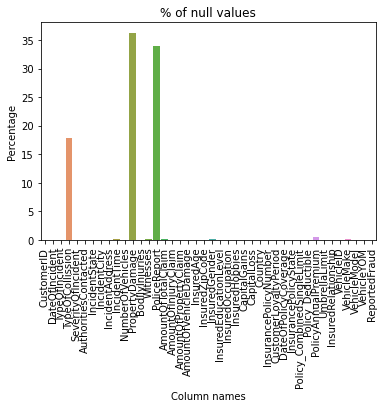

In [22]:
plot_percentage_null_value(data)


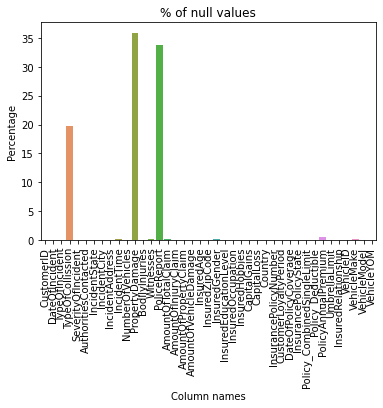

In [23]:
plot_percentage_null_value(test_data)

AROUND 35% OF THE DATA IS MISSING IN PROPERTY DAMAGE AND POLICE REPORT COLUMN AND AROUND 20 % DATA IS MISSING IN TYPEOFCOLLISION COLUMN, WE SHOULD FIND WAYS TO IMPUTE THEM BASED ON THEIR DISTRIBUTION

In [24]:
data.nunique()

CustomerID                    28836
DateOfIncident                   72
TypeOfIncident                    4
TypeOfCollission                  3
SeverityOfIncident                4
AuthoritiesContacted              5
IncidentState                     7
IncidentCity                      7
IncidentAddress                1000
IncidentTime                     24
NumberOfVehicles                  4
PropertyDamage                    2
BodilyInjuries                    3
Witnesses                         4
PoliceReport                      2
AmountOfTotalClaim            21975
AmountOfInjuryClaim           11958
AmountOfPropertyClaim         11785
AmountOfVehicleDamage         20041
InsuredAge                       46
InsuredZipCode                  995
InsuredGender                     2
InsuredEducationLevel             7
InsuredOccupation                14
InsuredHobbies                   20
CapitalGains                    338
CapitalLoss                     354
Country                     

WE CAN CLEARLY SEE THAT CUSTOMER ID, INSURANCE POLICY NUMBER ARE OF NO USE IN PREDICTION AND IN THE COUNTRY COLUMN THE NUMBER OF UNIQUE VALUE IS ONLY 1 HENCE WE CAN DELETE THESE COLUMNS

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28836 entries, 0 to 28835
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  28836 non-null  object 
 1   DateOfIncident              28836 non-null  object 
 2   TypeOfIncident              28836 non-null  object 
 3   TypeOfCollission            23674 non-null  object 
 4   SeverityOfIncident          28836 non-null  object 
 5   AuthoritiesContacted        28836 non-null  object 
 6   IncidentState               28836 non-null  object 
 7   IncidentCity                28836 non-null  object 
 8   IncidentAddress             28836 non-null  object 
 9   IncidentTime                28805 non-null  float64
 10  NumberOfVehicles            28836 non-null  int64  
 11  PropertyDamage              18377 non-null  object 
 12  BodilyInjuries              28836 non-null  int64  
 13  Witnesses                   287

The DTYPE of DATE_OF_INCIDENT and DATE_OF_POLICY_COVERAGE is OBJECT which need to be converted into DATE TIME format


In [26]:
data.columns

Index(['CustomerID', 'DateOfIncident', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'IncidentTime', 'NumberOfVehicles',
       'PropertyDamage', 'BodilyInjuries', 'Witnesses', 'PoliceReport',
       'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage', 'InsuredAge', 'InsuredZipCode',
       'InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation',
       'InsuredHobbies', 'CapitalGains', 'CapitalLoss', 'Country',
       'InsurancePolicyNumber', 'CustomerLoyaltyPeriod',
       'DateOfPolicyCoverage', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit', 'InsuredRelationship',
       'VehicleID', 'VehicleMake', 'VehicleModel', 'VehicleYOM',
       'ReportedFraud'],
      dtype='object')

In [27]:
data['DateOfIncident'] = pd.to_datetime(data['DateOfIncident'])
data['DateOfPolicyCoverage']=pd.to_datetime(data['DateOfPolicyCoverage'])

In [28]:
test_data['DateOfIncident'] = pd.to_datetime(test_data['DateOfIncident'])
test_data['DateOfPolicyCoverage']=pd.to_datetime(test_data['DateOfPolicyCoverage'])

# Checking relation between YEARS_AS_A_CUSTOMER and REPORTED_FRAUD

In [29]:
x=data[['CustomerID','DateOfIncident','DateOfPolicyCoverage','ReportedFraud']]
x['years_as_a_customer']=x['DateOfIncident']-x['DateOfPolicyCoverage']
x['years_as_a_customer']=pd.to_timedelta(x['years_as_a_customer'], errors='coerce').dt.days
data['years_as_a_customer']=x['years_as_a_customer']/365

Years as a customer who has not commited fraud


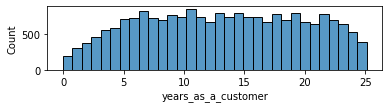

Years as a customer who has commited fraud


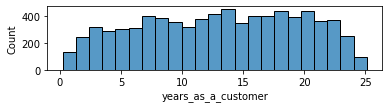

In [30]:
NO=x[x['ReportedFraud']=='N']
YES=x[x['ReportedFraud']=='Y']
plt.subplot(311)
print("Years as a customer who has not commited fraud")
sns.histplot(NO['years_as_a_customer']/365)
plt.show()
plt.subplot(312)
print("Years as a customer who has commited fraud")
sns.histplot(YES['years_as_a_customer']/365)
plt.show()

In [31]:
test_data['years_as_a_customer']=test_data['DateOfIncident']-test_data['DateOfPolicyCoverage']
test_data['years_as_a_customer']=pd.to_timedelta(test_data['years_as_a_customer'], errors='coerce').dt.days
test_data['years_as_a_customer']=test_data['years_as_a_customer']/365

I cant find any relation as the number of customers in all the bins are approximately same

# Checking relation between INSURED_AGE and REPORTED_FRAUD

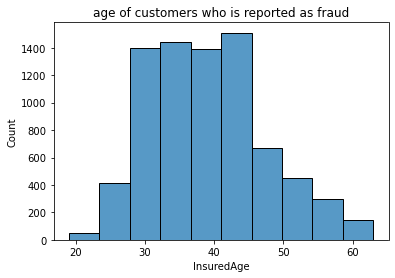

In [32]:
insured_age=data[['CustomerID','InsuredAge','ReportedFraud']]
insured_age=insured_age[insured_age['ReportedFraud']=='Y']
sns.histplot(insured_age['InsuredAge'],bins=10)
plt.title('age of customers who is reported as fraud')
plt.show()

we can see that majority of frauds are done by people ageing 30-45

# MISSING VALUE TREATMENT

In [33]:
data.isnull().sum()

CustomerID                        0
DateOfIncident                    0
TypeOfIncident                    0
TypeOfCollission               5162
SeverityOfIncident                0
AuthoritiesContacted              0
IncidentState                     0
IncidentCity                      0
IncidentAddress                   0
IncidentTime                     31
NumberOfVehicles                  0
PropertyDamage                10459
BodilyInjuries                    0
Witnesses                        46
PoliceReport                   9805
AmountOfTotalClaim               50
AmountOfInjuryClaim               0
AmountOfPropertyClaim             0
AmountOfVehicleDamage             0
InsuredAge                        0
InsuredZipCode                    0
InsuredGender                    30
InsuredEducationLevel             0
InsuredOccupation                 0
InsuredHobbies                    0
CapitalGains                      0
CapitalLoss                       0
Country                     

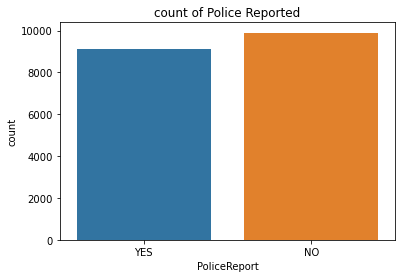

In [34]:
sns.countplot(data['PoliceReport'])
plt.title('count of Police Reported')
plt.show()

the distribution is almost same for yes and no, hence we cant just impute mode, so its better to rename null values as an other category

Replacing null value in police report to 'dont know'

In [35]:
data['PoliceReport']=data['PoliceReport'].replace(to_replace = np.nan, value ='dont know')

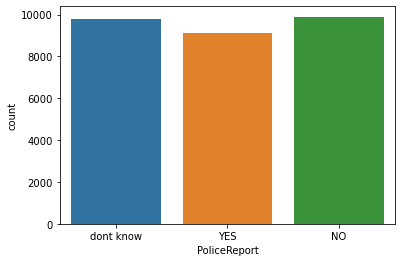

In [36]:
sns.countplot(data['PoliceReport'])
plt.show()

In [37]:
test_data['PoliceReport']=test_data['PoliceReport'].replace(to_replace = np.nan, value ='dont know')

                           ***********************************************

In [38]:
data['TypeOfCollission'].unique()

array(['Side Collision', 'Rear Collision', 'Front Collision', nan],
      dtype=object)

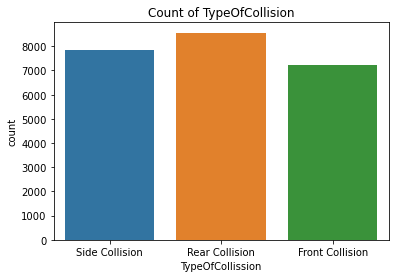

In [39]:
plt.subplot(111)
sns.countplot(data['TypeOfCollission'])
plt.title('Count of TypeOfCollision')
plt.show()

As the data is almost uniform we cant use mode to impute, if we use it then majority of the values will become Rear collision which is against the original distribution, hence i have built a KNN MODEL to impute 

In [40]:
data_claim_new=pd.read_csv('train_claim_new.csv',na_values=['?','MISSEDDATA','MISSINGVALUE','-5'])
data_claim_new=data_claim_new[['CustomerID','TypeOfCollission']]
data_claim_new.columns=['CustomerID','TypeOfCollissionNew']
data=data.merge(data_claim_new,on='CustomerID')

In [41]:
data.drop('TypeOfCollission',axis=1,inplace=True)
column = data.pop('TypeOfCollissionNew')
data.insert(3, 'TypeOfCollission', column)

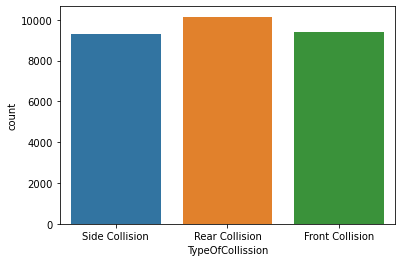

In [42]:
sns.countplot(data['TypeOfCollission'])
plt.show()

In [43]:
test_data_claim_new=pd.read_csv('test_data_claim_new.csv',na_values=['?','MISSEDDATA','MISSINGVALUE','-5'])
test_data_claim_new=test_data_claim_new[['CustomerID','TypeOfCollission']]
test_data_claim_new.columns=['CustomerID','TypeOfCollissionNew']
test_data=test_data.merge(test_data_claim_new,on='CustomerID')

In [44]:
test_data.drop('TypeOfCollission',axis=1,inplace=True)
column = test_data.pop('TypeOfCollissionNew')
test_data.insert(3, 'TypeOfCollission', column)

                                       ******************************************

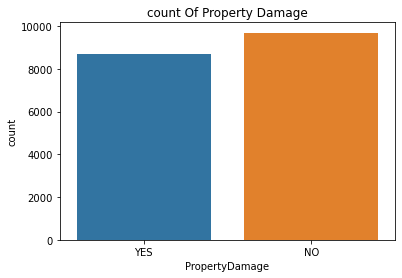

In [45]:
sns.countplot(data['PropertyDamage'])
plt.title('count Of Property Damage')
plt.show()


As the data is almost uniform we cant use mode to impute, if we use it then majority of the values will become 'No' which is against the original distribution, hence i have built a KNN MODEL to impute 

In [46]:
data_claim_pd_new=pd.read_csv('train_claim_new_1.csv',na_values=['?','MISSEDDATA','MISSINGVALUE','-5'])
data_claim_pd_new=data_claim_pd_new[['CustomerID','PropertyDamage']]
data_claim_pd_new.columns=['CustomerID','PropertyDamageNew']
data=data.merge(data_claim_pd_new,on='CustomerID')

In [47]:
data.drop('PropertyDamage',axis=1,inplace=True)
column = data.pop('PropertyDamageNew')
data.insert(11, 'PropertyDamage', column)

In [48]:
test_data_pd_new=pd.read_csv('test_data_claim_new_1.csv',na_values=['?','MISSEDDATA','MISSINGVALUE','-5'])
test_data_pd_new=test_data_pd_new[['CustomerID','PropertyDamage']]
test_data_pd_new.columns=['CustomerID','PropertyDamageNew']
test_data=test_data.merge(test_data_pd_new,on='CustomerID')

In [49]:
test_data.drop('PropertyDamage',axis=1,inplace=True)
column = test_data.pop('PropertyDamageNew')
test_data.insert(3, 'PropertyDamage', column)

Other columns has less null values and will be imputed with mean for numerical column and with mode for categorical column in the pipeline

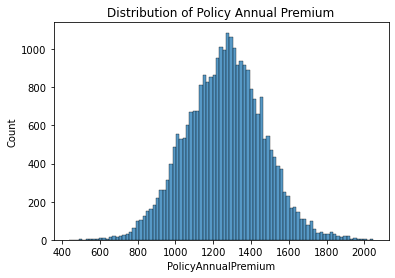

In [50]:
sns.histplot(data['PolicyAnnualPremium'])
plt.title("Distribution of Policy Annual Premium")
plt.show()

as policy annual premium column is normally distributed we can use mean to impute the missing value

<AxesSubplot:xlabel='Witnesses', ylabel='count'>

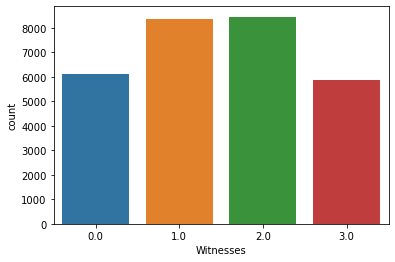

In [51]:
sns.countplot(data['Witnesses'])

We can impute this column with mode

In [52]:
cat_cols=['TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState','PropertyDamage',
       'IncidentCity','NumberOfVehicles', 'BodilyInjuries', 'Witnesses', 'PoliceReport','InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation',
       'InsuredHobbies','InsurancePolicyState','Policy_CombinedSingleLimit','InsuredRelationship','VehicleMake', 'VehicleModel', 'VehicleYOM']

In [53]:
num_cols1=[ 'AmountOfTotalClaim','AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage','CapitalGains', 'CapitalLoss','Policy_Deductible',
       'PolicyAnnualPremium','InsuredAge', 'UmbrellaLimit','CustomerLoyaltyPeriod','years_as_a_customer']

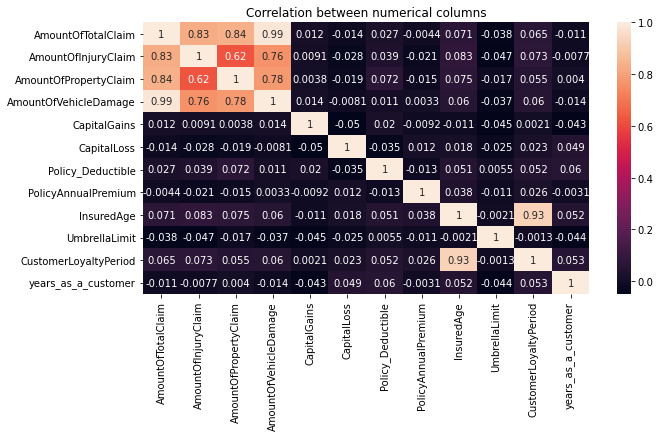

In [54]:
plt.figure(figsize=(10,5))
sns.heatmap(data[num_cols1].corr(),annot=True)
plt.title('Correlation between numerical columns')
plt.show()

Amount of total claim need to be deleted as it has high correlation

In [55]:
num_cols=[ 'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage','CapitalGains', 'CapitalLoss','Policy_Deductible',
       'PolicyAnnualPremium','InsuredAge', 'UmbrellaLimit','CustomerLoyaltyPeriod','years_as_a_customer']

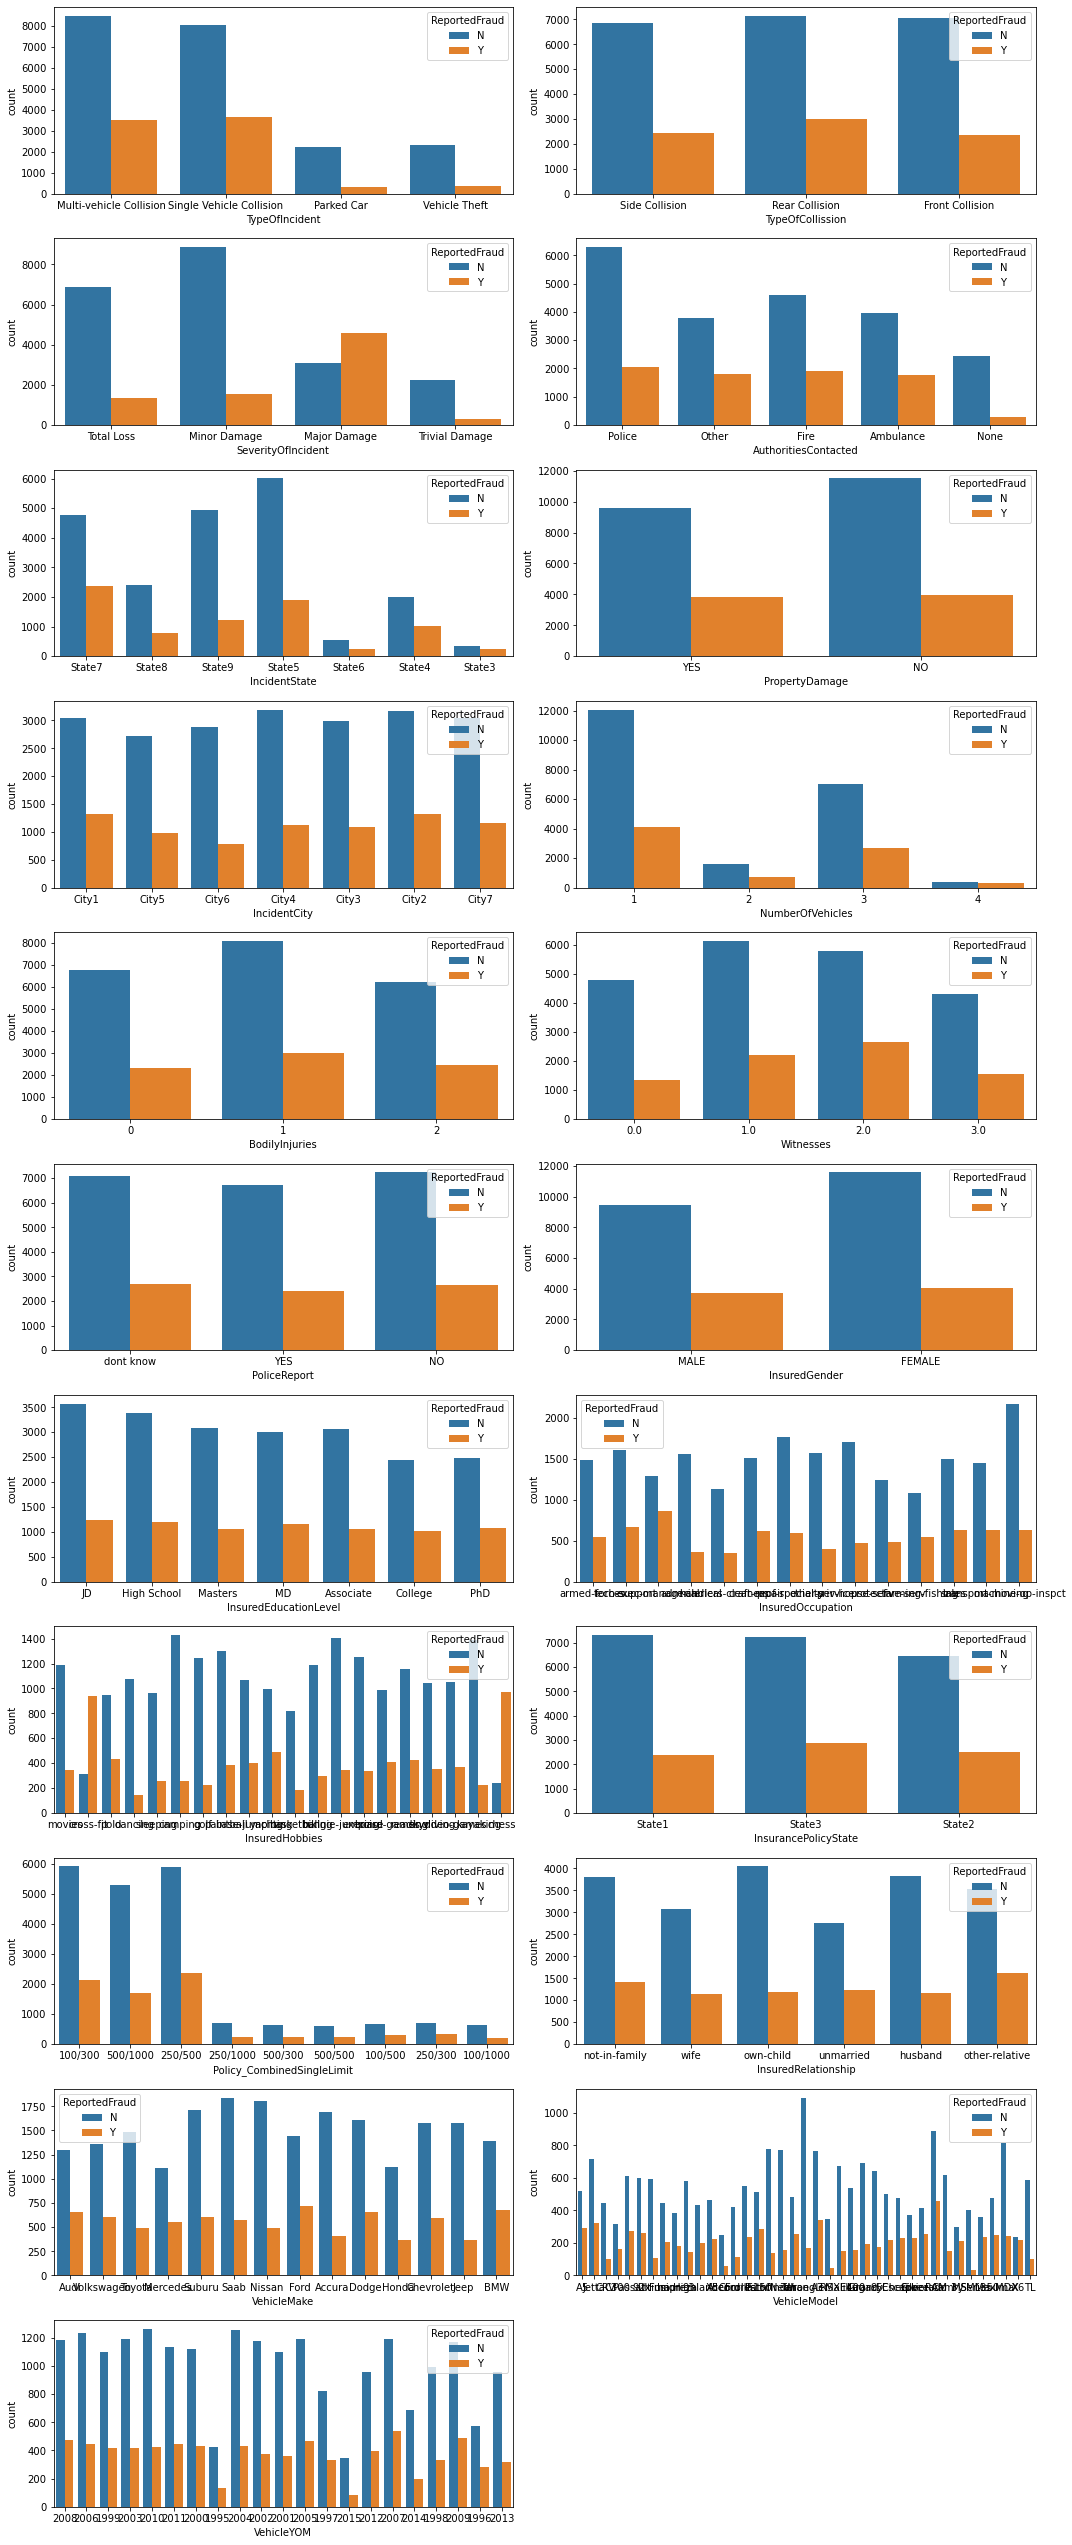

In [56]:
plt.figure(figsize=(15,80))

for i in range(0, len(cat_cols)):
    plt.subplot(25,2,i+1)
    sns.countplot(x=data[cat_cols[i]],hue=data['ReportedFraud'])
    plt.xlabel(cat_cols[i])
    plt.xticks(rotation=0)
    plt.tight_layout()

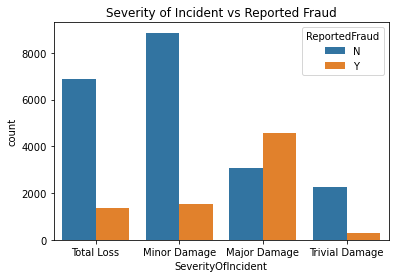

In [57]:
sns.countplot(x=data['SeverityOfIncident'],hue=data['ReportedFraud'])
plt.title('Severity of Incident vs Reported Fraud')
plt.show()

Possibility of reporting fraud is high for customers claiming that they have major damage

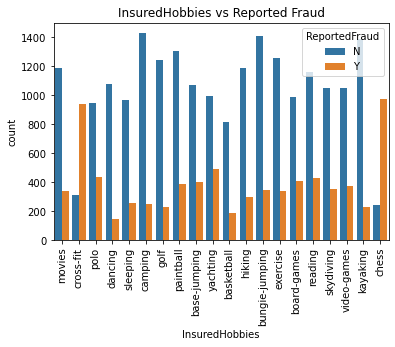

In [58]:
sns.countplot(x=data['InsuredHobbies'],hue=data['ReportedFraud'])
plt.title('InsuredHobbies vs Reported Fraud')
plt.xticks(rotation=90)
plt.show()

its seen that customers whose hobbies are cross-fit and chess tend to do more fraud then others

In [59]:
num_cols2=[ 'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage','CapitalGains', 'CapitalLoss','Policy_Deductible',
       'PolicyAnnualPremium','InsuredAge', 'UmbrellaLimit','CustomerLoyaltyPeriod','years_as_a_customer','ReportedFraud']

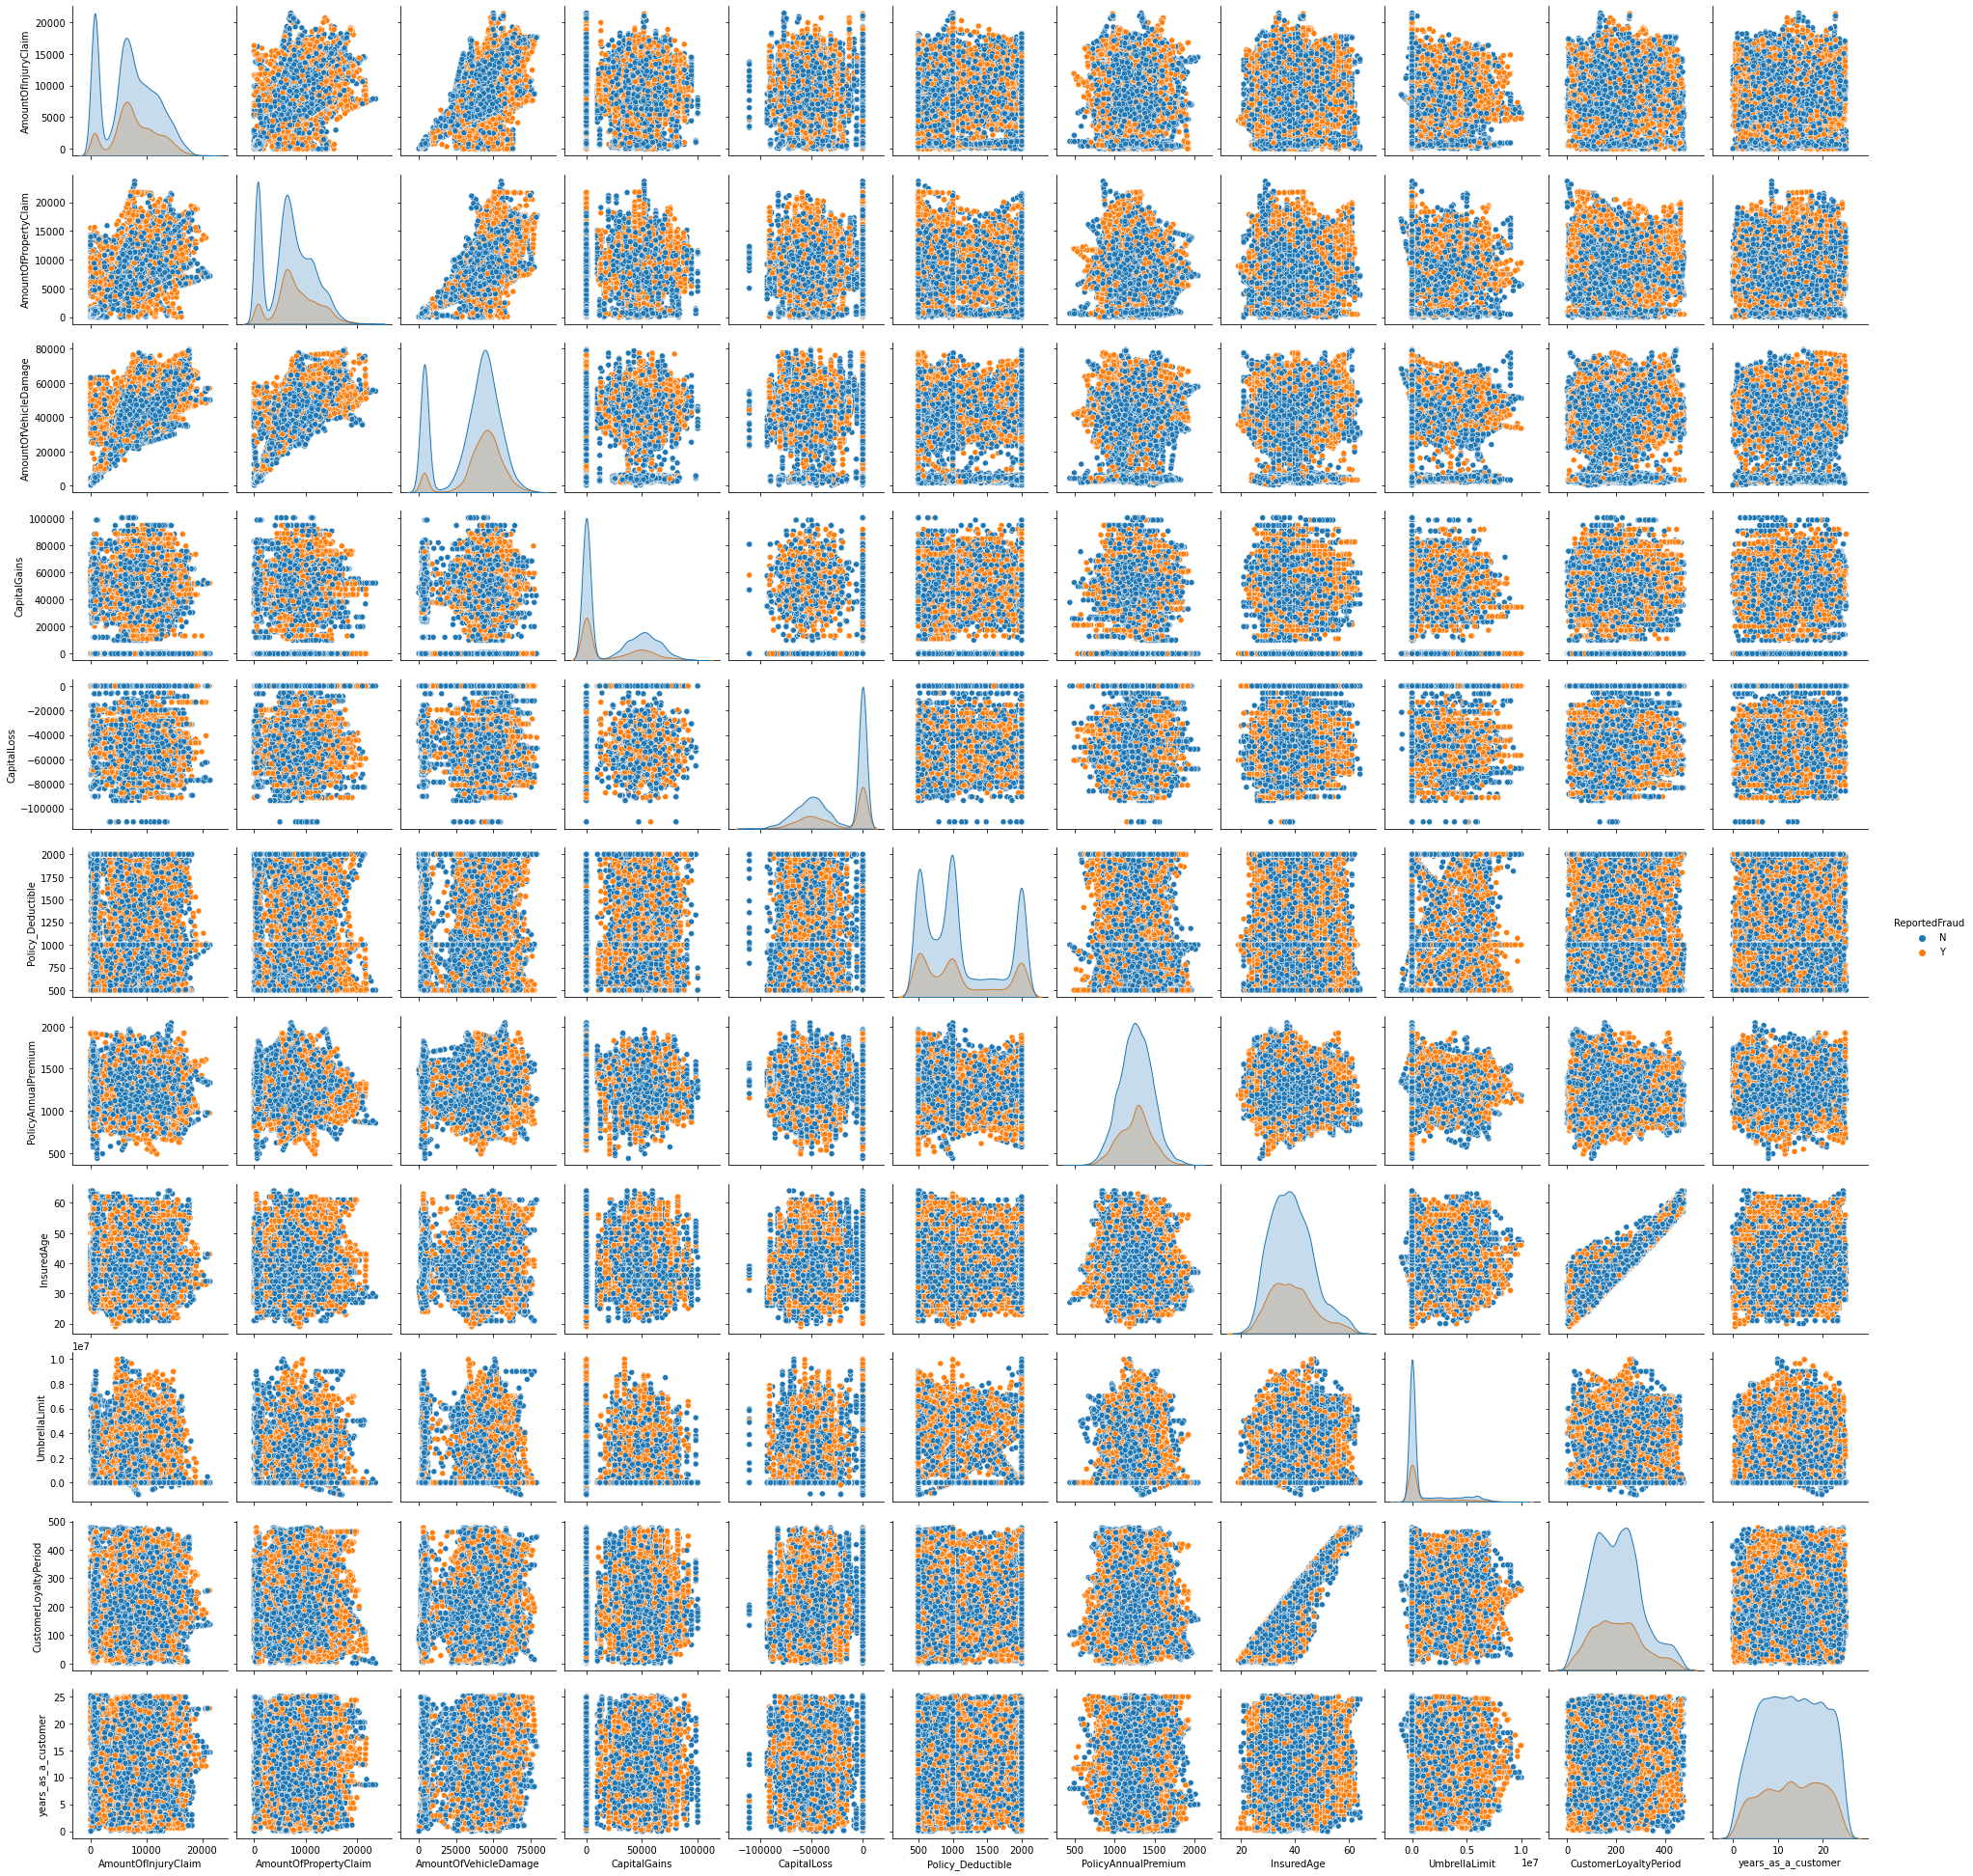

In [60]:
sns.pairplot(data[num_cols2],hue='ReportedFraud')

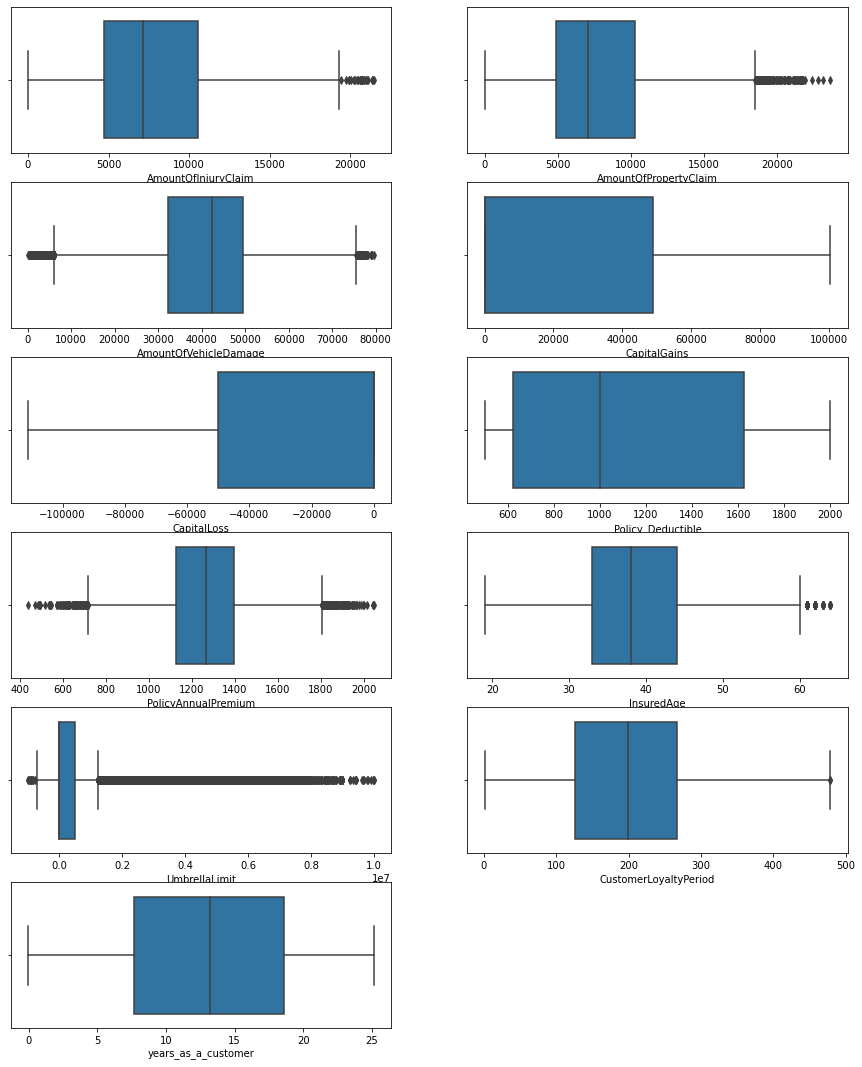

In [61]:
plt.figure(figsize=(15,80))
for i in range(0,len(num_cols)):
    plt.subplot(25,2,i+1)
    sns.boxplot(x=data[num_cols[i]], data=data)
    plt.xlabel(num_cols[i])
    plt.xticks(rotation=0)
    #plt.title('Amount of Injury Claim vs Reported Fraud')
    

there are many outliers in the data, we should normalize it and check if the outliers still exists

Normalizing the data and imputing other null values are done using pipeline

# Dropping Unwanted Columns

In [62]:
to_drop=['CustomerID','DateOfIncident','IncidentAddress','IncidentTime','AmountOfTotalClaim','InsuredZipCode','Country','InsurancePolicyNumber','DateOfPolicyCoverage','VehicleID']

In [63]:
data.drop(to_drop,axis=1,inplace=True)

In [64]:
test_data.drop(to_drop,axis=1,inplace=True)

In [65]:
for i in cat_cols:
    data[i]=data[i].astype('category')

# Encoding Target Column

In [66]:
data['ReportedFraud']=data['ReportedFraud'].replace(to_replace =['Y','N'],value=[1,0])

# Solving Class Imbalance Problem

In [67]:
df_majority = data[data.ReportedFraud==0]
df_minority = data[data.ReportedFraud==1]

In [68]:
from sklearn.utils import resample

In [69]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123)

In [70]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [71]:
df_upsampled.ReportedFraud.value_counts()

1    21051
0    21051
Name: ReportedFraud, dtype: int64

In [72]:
y=df_upsampled['ReportedFraud']
X=df_upsampled.drop('ReportedFraud',axis=1)


# Model Training

In [73]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#from xgboost import XGBClassifier

#from vecstack import stacking

from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [74]:
numeric_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                                      ('scaler', StandardScaler())])

In [75]:
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                          ('onehot', OneHotEncoder(handle_unknown = 'ignore'))])

In [76]:
preprocessor=ColumnTransformer(transformers=[('num',numeric_transformer, num_cols),('cat',categorical_transformer,cat_cols)])

In [77]:
def evaluate_model(act, pred):
    from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
    print("Confusion Matrix \n", confusion_matrix(act, pred))
    print("Accurcay : ", accuracy_score(act, pred))
    print("Recall   : ", recall_score(act, pred, average='weighted'))
    print("Precision: ", precision_score(act, pred, average='weighted'))  

# RandomForest

In [78]:
RF1_pipe = Pipeline(steps=[('pp',preprocessor),
                   ('rf_classifier', RandomForestClassifier())])

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.2,random_state=5)

In [80]:
RF1_pipe.fit(X_train,y_train)

Pipeline(steps=[('pp',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['AmountOfInjuryClaim',
                                                   'AmountOfPropertyClaim',
                                                   'AmountOfVehicleDamage',
                                                   'CapitalGains',
                                                   'CapitalLoss',
                                                   'Policy_Deductible',
                                                   'PolicyAnnualPremium',
                                                   'InsuredAge',
                                                   'UmbrellaLimit',
                                                   'CustomerLoyaltyPeriod',
                                                   'years_as_a_customer...
                                                   'IncidentState',
                                                   'PropertyDamage',
                                                   'IncidentCity',
                                                   'NumberOfVehicles',
                                                   'BodilyInjuries',
                                                   'Witnesses', 'PoliceReport',
                                                   'InsuredGender',
                                                   'InsuredEducationLevel',
                                                   'InsuredOccupation',
                                                   'InsuredHobbies',
                                                   'InsurancePolicyState',
                                                   'Policy_CombinedSingleLimit',
                                                   'InsuredRelationship',
                                                   'VehicleMake',
                                                   'VehicleModel',
                                                   'VehicleYOM'])])),
                ('rf_classifier', RandomForestClassifier())])

In [81]:
train_pred_RFPipe = RF1_pipe.predict(X_train)
test_pred_RFPipe = RF1_pipe.predict(X_test)

In [82]:
print("--Train--")
evaluate_model(y_train, train_pred_RFPipe)
print("--Test--")
evaluate_model(y_test, test_pred_RFPipe)

--Train--
Confusion Matrix 
 [[16771     0]
 [    0 16910]]
Accurcay :  1.0
Recall   :  1.0
Precision:  1.0
--Test--
Confusion Matrix 
 [[4144  136]
 [  76 4065]]
Accurcay :  0.9748248426552666
Recall   :  0.9748248426552666
Precision:  0.9749271851261795


In [83]:
f1_score(y_test, test_pred_RFPipe,pos_label=1)

0.9745864301126829

# SVM

In [84]:
SVM_pipe = Pipeline(steps=[('pp',preprocessor),
                   ('svm_classifier', SVC(kernel='rbf'))])

In [85]:
SVM_pipe.fit(X_train,y_train)

Pipeline(steps=[('pp',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['AmountOfInjuryClaim',
                                                   'AmountOfPropertyClaim',
                                                   'AmountOfVehicleDamage',
                                                   'CapitalGains',
                                                   'CapitalLoss',
                                                   'Policy_Deductible',
                                                   'PolicyAnnualPremium',
                                                   'InsuredAge',
                                                   'UmbrellaLimit',
                                                   'CustomerLoyaltyPeriod',
                                                   'years_as_a_customer...
                                                   'AuthoritiesContacted',
                                                   'IncidentState',
                                                   'PropertyDamage',
                                                   'IncidentCity',
                                                   'NumberOfVehicles',
                                                   'BodilyInjuries',
                                                   'Witnesses', 'PoliceReport',
                                                   'InsuredGender',
                                                   'InsuredEducationLevel',
                                                   'InsuredOccupation',
                                                   'InsuredHobbies',
                                                   'InsurancePolicyState',
                                                   'Policy_CombinedSingleLimit',
                                                   'InsuredRelationship',
                                                   'VehicleMake',
                                                   'VehicleModel',
                                                   'VehicleYOM'])])),
                ('svm_classifier', SVC())])

In [86]:
train_pred_SVMPipe = SVM_pipe.predict(X_train)
test_pred_SVMPipe = SVM_pipe.predict(X_test)

In [87]:
print("--Train--")
evaluate_model(y_train, train_pred_SVMPipe)
print("--Test--")
evaluate_model(y_test, test_pred_SVMPipe)

--Train--
Confusion Matrix 
 [[16430   341]
 [ 1853 15057]]
Accurcay :  0.934859416288115
Recall   :  0.934859416288115
Precision:  0.9384150807827639
--Test--
Confusion Matrix 
 [[4164  116]
 [ 503 3638]]
Accurcay :  0.9264932905830662
Recall   :  0.9264932905830662
Precision:  0.9300263208419693


In [88]:
f1_score(y_test, test_pred_SVMPipe,pos_label=1)

0.9215959468017733

# AdaBoostClassifier

In [89]:
AB_pipe = Pipeline(steps=[('pp',preprocessor),
                   ('ab_classifier', AdaBoostClassifier())])

In [90]:
AB_pipe.fit(X_train,y_train)

Pipeline(steps=[('pp',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['AmountOfInjuryClaim',
                                                   'AmountOfPropertyClaim',
                                                   'AmountOfVehicleDamage',
                                                   'CapitalGains',
                                                   'CapitalLoss',
                                                   'Policy_Deductible',
                                                   'PolicyAnnualPremium',
                                                   'InsuredAge',
                                                   'UmbrellaLimit',
                                                   'CustomerLoyaltyPeriod',
                                                   'years_as_a_customer...
                                                   'AuthoritiesContacted',
                                                   'IncidentState',
                                                   'PropertyDamage',
                                                   'IncidentCity',
                                                   'NumberOfVehicles',
                                                   'BodilyInjuries',
                                                   'Witnesses', 'PoliceReport',
                                                   'InsuredGender',
                                                   'InsuredEducationLevel',
                                                   'InsuredOccupation',
                                                   'InsuredHobbies',
                                                   'InsurancePolicyState',
                                                   'Policy_CombinedSingleLimit',
                                                   'InsuredRelationship',
                                                   'VehicleMake',
                                                   'VehicleModel',
                                                   'VehicleYOM'])])),
                ('ab_classifier', AdaBoostClassifier())])

In [91]:
train_pred_ABPipe = AB_pipe.predict(X_train)
test_pred_ABPipe = AB_pipe.predict(X_test)

In [92]:
print("--Train--")
evaluate_model(y_train, train_pred_ABPipe)
print("--Test--")
evaluate_model(y_test, test_pred_ABPipe)

--Train--
Confusion Matrix 
 [[13873  2898]
 [ 3795 13115]]
Accurcay :  0.8012826222499332
Recall   :  0.8012826222499332
Precision:  0.8021832483444509
--Test--
Confusion Matrix 
 [[3551  729]
 [ 938 3203]]
Accurcay :  0.8020425127657048
Recall   :  0.8020425127657048
Precision:  0.8026270821856125


In [93]:
f1_score(y_test, test_pred_ABPipe,pos_label=1)

0.7935092282918371

# DecisionTreeClassifier

In [94]:
DT_pipe = Pipeline(steps=[('pp',preprocessor),
                   ('dt_classifier', DecisionTreeClassifier())])

In [95]:
DT_pipe.fit(X_train,y_train)

Pipeline(steps=[('pp',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['AmountOfInjuryClaim',
                                                   'AmountOfPropertyClaim',
                                                   'AmountOfVehicleDamage',
                                                   'CapitalGains',
                                                   'CapitalLoss',
                                                   'Policy_Deductible',
                                                   'PolicyAnnualPremium',
                                                   'InsuredAge',
                                                   'UmbrellaLimit',
                                                   'CustomerLoyaltyPeriod',
                                                   'years_as_a_customer...
                                                   'IncidentState',
                                                   'PropertyDamage',
                                                   'IncidentCity',
                                                   'NumberOfVehicles',
                                                   'BodilyInjuries',
                                                   'Witnesses', 'PoliceReport',
                                                   'InsuredGender',
                                                   'InsuredEducationLevel',
                                                   'InsuredOccupation',
                                                   'InsuredHobbies',
                                                   'InsurancePolicyState',
                                                   'Policy_CombinedSingleLimit',
                                                   'InsuredRelationship',
                                                   'VehicleMake',
                                                   'VehicleModel',
                                                   'VehicleYOM'])])),
                ('dt_classifier', DecisionTreeClassifier())])

In [96]:
train_pred_DTPipe = DT_pipe.predict(X_train)
test_pred_DTPipe = DT_pipe.predict(X_test)

In [97]:
print("--Train--")
evaluate_model(y_train, train_pred_DTPipe)
print("--Test--")
evaluate_model(y_test, test_pred_DTPipe)

--Train--
Confusion Matrix 
 [[16771     0]
 [    0 16910]]
Accurcay :  1.0
Recall   :  1.0
Precision:  1.0
--Test--
Confusion Matrix 
 [[3799  481]
 [ 121 4020]]
Accurcay :  0.9285120532003325
Recall   :  0.9285120532003325
Precision:  0.9317609792056472


In [98]:
f1_score(y_test, test_pred_DTPipe,pos_label=1)

0.9303401990280028

# KNN

In [99]:
KNN_pipe = Pipeline(steps=[('pp',preprocessor),
                   ('knn_classifier', KNeighborsClassifier())])

In [100]:
KNN_pipe.fit(X_train,y_train)

Pipeline(steps=[('pp',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['AmountOfInjuryClaim',
                                                   'AmountOfPropertyClaim',
                                                   'AmountOfVehicleDamage',
                                                   'CapitalGains',
                                                   'CapitalLoss',
                                                   'Policy_Deductible',
                                                   'PolicyAnnualPremium',
                                                   'InsuredAge',
                                                   'UmbrellaLimit',
                                                   'CustomerLoyaltyPeriod',
                                                   'years_as_a_customer...
                                                   'IncidentState',
                                                   'PropertyDamage',
                                                   'IncidentCity',
                                                   'NumberOfVehicles',
                                                   'BodilyInjuries',
                                                   'Witnesses', 'PoliceReport',
                                                   'InsuredGender',
                                                   'InsuredEducationLevel',
                                                   'InsuredOccupation',
                                                   'InsuredHobbies',
                                                   'InsurancePolicyState',
                                                   'Policy_CombinedSingleLimit',
                                                   'InsuredRelationship',
                                                   'VehicleMake',
                                                   'VehicleModel',
                                                   'VehicleYOM'])])),
                ('knn_classifier', KNeighborsClassifier())])

In [101]:
train_pred_KNNPipe = KNN_pipe.predict(X_train)
test_pred_KNNPipe = KNN_pipe.predict(X_test)

In [102]:
print("--Train--")
evaluate_model(y_train, train_pred_KNNPipe)
print("--Test--")
evaluate_model(y_test, test_pred_KNNPipe)

--Train--
Confusion Matrix 
 [[15511  1260]
 [  803 16107]]
Accurcay :  0.9387488494997179
Recall   :  0.9387488494997179
Precision:  0.9390654002972595
--Test--
Confusion Matrix 
 [[3849  431]
 [ 336 3805]]
Accurcay :  0.9089181807386296
Recall   :  0.9089181807386296
Precision:  0.9091602800508254


In [103]:
f1_score(y_test, test_pred_KNNPipe,pos_label=1)

0.9084397755759819

# HYPERPARAMETER TUNING

KNN

In [104]:
param_grid1={'knn_classifier__n_neighbors':[5,7,9],
            'knn_classifier__weights':['uniform','distance'],
            'knn_classifier__metric':['minkowski','euclidean','manhattan']}

grid_search1=GridSearchCV(KNN_pipe,param_grid1)

In [105]:
grid_search1.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('pp',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['AmountOfInjuryClaim',
                                                                          'AmountOfPropertyClaim',
                                                                          'AmountOfVehicleDamage',
                                                                          'CapitalGains',
                                                                          'CapitalLoss',
                                                                          'Policy_Deductible',
                                                                          'PolicyAnnualPremium',
                                                                          'InsuredAge',
                                                                          'UmbrellaLimit',
                                                                          'CustomerLoyaltyPerio...
                                                                          'InsuredOccupation',
                                                                          'InsuredHobbies',
                                                                          'InsurancePolicyState',
                                                                          'Policy_CombinedSingleLimit',
                                                                          'InsuredRelationship',
                                                                          'VehicleMake',
                                                                          'VehicleModel',
                                                                          'VehicleYOM'])])),
                                       ('knn_classifier',
                                        KNeighborsClassifier())]),
             param_grid={'knn_classifier__metric': ['minkowski', 'euclidean',
                                                    'manhattan'],
                         'knn_classifier__n_neighbors': [5, 7, 9],
                         'knn_classifier__weights': ['uniform', 'distance']})

In [106]:
train_pred_knngridPipe = grid_search1.predict(X_train)
test_pred_knngridPipe = grid_search1.predict(X_test)

In [107]:
print("--Train--")
evaluate_model(y_train, train_pred_knngridPipe)
print("--Test--")
evaluate_model(y_test, test_pred_knngridPipe)

--Train--
Confusion Matrix 
 [[16771     0]
 [    0 16910]]
Accurcay :  1.0
Recall   :  1.0
Precision:  1.0
--Test--
Confusion Matrix 
 [[3991  289]
 [  59 4082]]
Accurcay :  0.9586747417171357
Recall   :  0.9586747417171357
Precision:  0.9600827014794574


In [108]:
f1_score(y_test, test_pred_knngridPipe,pos_label=1)

0.9591165413533835

ADA BOOST

In [109]:
param_gridab={'ab_classifier__n_estimators':[50,100,30,80],
            'ab_classifier__algorithm':['SAMME', 'SAMME.R']}

grid_search_ab=GridSearchCV(AB_pipe,param_gridab)

In [110]:
grid_search_ab.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('pp',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['AmountOfInjuryClaim',
                                                                          'AmountOfPropertyClaim',
                                                                          'AmountOfVehicleDamage',
                                                                          'CapitalGains',
                                                                          'CapitalLoss',
                                                                          'Policy_Deductible',
                                                                          'PolicyAnnualPremium',
                                                                          'InsuredAge',
                                                                          'UmbrellaLimit',
                                                                          'CustomerLoyaltyPerio...
                                                                          'PoliceReport',
                                                                          'InsuredGender',
                                                                          'InsuredEducationLevel',
                                                                          'InsuredOccupation',
                                                                          'InsuredHobbies',
                                                                          'InsurancePolicyState',
                                                                          'Policy_CombinedSingleLimit',
                                                                          'InsuredRelationship',
                                                                          'VehicleMake',
                                                                          'VehicleModel',
                                                                          'VehicleYOM'])])),
                                       ('ab_classifier',
                                        AdaBoostClassifier())]),
             param_grid={'ab_classifier__algorithm': ['SAMME', 'SAMME.R'],
                         'ab_classifier__n_estimators': [50, 100, 30, 80]})

In [111]:
train_pred_abgridPipe = grid_search_ab.predict(X_train)
test_pred_abgridPipe = grid_search_ab.predict(X_test)

In [112]:
print("--Train--")
evaluate_model(y_train, train_pred_abgridPipe)
print("--Test--")
evaluate_model(y_test, test_pred_abgridPipe)

--Train--
Confusion Matrix 
 [[13938  2833]
 [ 3625 13285]]
Accurcay :  0.8082598497669309
Recall   :  0.8082598497669309
Precision:  0.8089801907963418
--Test--
Confusion Matrix 
 [[3566  714]
 [ 921 3220]]
Accurcay :  0.8058425365158532
Recall   :  0.8058425365158532
Precision:  0.8064267130087048


In [113]:
f1_score(y_test, test_pred_abgridPipe,pos_label=1)

0.7975232198142416

# Getting the top 20 features

In [114]:
RF1_pipe.get_params()

{'memory': None,
 'steps': [('pp', ColumnTransformer(transformers=[('num',
                                    Pipeline(steps=[('imputer', SimpleImputer()),
                                                    ('scaler', StandardScaler())]),
                                    ['AmountOfInjuryClaim',
                                     'AmountOfPropertyClaim',
                                     'AmountOfVehicleDamage', 'CapitalGains',
                                     'CapitalLoss', 'Policy_Deductible',
                                     'PolicyAnnualPremium', 'InsuredAge',
                                     'UmbrellaLimit', 'CustomerLoyaltyPeriod',
                                     'years_as_a_customer']),
                                   ('cat',
                                    Pipeline(st...
                                     'SeverityOfIncident', 'AuthoritiesContacted',
                                     'IncidentState', 'PropertyDamage',
                      

In [115]:
colz=RF1_pipe[:-1].get_feature_names_out()

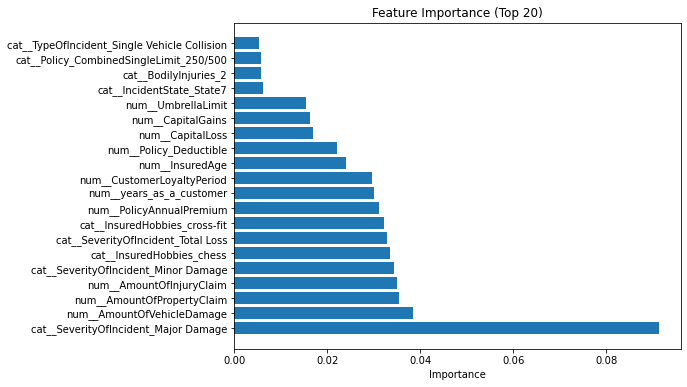

In [116]:
# Calculate feature importance using random forest model
feature_importance = pd.Series(RF1_pipe.get_params()['rf_classifier'].feature_importances_, index=colz)

# Get the top 20 features with highest importance and plot them
top_20 = feature_importance.nlargest(20)
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_20.index, top_20.values)
ax.set_xlabel('Importance')
ax.set_title('Feature Importance (Top 20)')

# Show the plot
plt.show()

In [117]:
top_20

cat__SeverityOfIncident_Major Damage            0.091392
num__AmountOfVehicleDamage                      0.038373
num__AmountOfPropertyClaim                      0.035409
num__AmountOfInjuryClaim                        0.034881
cat__SeverityOfIncident_Minor Damage            0.034280
cat__InsuredHobbies_chess                       0.033547
cat__SeverityOfIncident_Total Loss              0.032833
cat__InsuredHobbies_cross-fit                   0.032227
num__PolicyAnnualPremium                        0.031178
num__years_as_a_customer                        0.030030
num__CustomerLoyaltyPeriod                      0.029595
num__InsuredAge                                 0.023942
num__Policy_Deductible                          0.022028
num__CapitalLoss                                0.016979
num__CapitalGains                               0.016208
num__UmbrellaLimit                              0.015451
cat__IncidentState_State7                       0.006249
cat__BodilyInjuries_2          

# Prediction for test data

In [118]:
prediction=RF1_pipe.predict(test_data)

In [119]:
test_data_copy['Prediction']=prediction

In [120]:
test_data_copy.head()

CustomerID DateOfIncident            TypeOfIncident TypeOfCollission  \
0  Cust10008     2015-02-05   Multi-vehicle Collision  Front Collision   
1  Cust10010     2015-01-13  Single Vehicle Collision   Rear Collision   
2  Cust10015     2015-01-05   Multi-vehicle Collision   Rear Collision   
3  Cust10020     2015-01-03             Vehicle Theft              NaN   
4   Cust1003     2015-02-22   Multi-vehicle Collision   Rear Collision   

  SeverityOfIncident AuthoritiesContacted IncidentState IncidentCity  \
0       Minor Damage            Ambulance        State5        City2   
1       Minor Damage                 Fire        State9        City5   
2       Minor Damage               Police        State5        City2   
3     Trivial Damage                 None        State7        City5   
4       Minor Damage               Police        State5        City2   

  IncidentAddress  IncidentTime  ...  Policy_CombinedSingleLimit  \
0   Location 1354           4.0  ...                    500/1000   
1   Location 1383          16.0  ...                     100/300   
2   Location 2030          20.0  ...                     250/500   
3   Location 1449          10.0  ...                     500/500   
4   Location 1916           7.0  ...                     100/300   

  Policy_Deductible  PolicyAnnualPremium  UmbrellaLimit InsuredRelationship  \
0              2000              1006.00              0           own-child   
1               500              1279.17              0           unmarried   
2              1000              1454.67        1235986      other-relative   
3              2000              1287.76        5873212                wife   
4              2000              1413.14        5000000           own-child   

      VehicleID  VehicleMake  VehicleModel  VehicleYOM  Prediction  
0  Vehicle34362   Volkswagen        Passat        1995           0  
1  Vehicle17046       Nissan        Ultima        2006           0  
2  Vehicle11038       Suburu       Impreza        2010           0  
3  Vehicle37114       Accura            TL        2009           0  
4  Vehicle16771        Dodge           RAM        2007           0  

[5 rows x 42 columns]

In [121]:
test_prediction=test_data_copy[['CustomerID','Prediction']]

In [122]:
read_test=pd.read_csv(r'C:\Users\win10\Desktop\New folder (4)\capstone-files\TestData\Test.csv')

In [123]:
read_test.shape

(8912, 1)

In [124]:
read_test=read_test.merge(test_prediction,on='CustomerID')

In [125]:
read_test.to_csv('Sample_submission1.csv')

In [126]:
read_test.shape

(8912, 2)

In [127]:
read_test.Prediction.value_counts()

0    7496
1    1416
Name: Prediction, dtype: int64